# Gradient descent (GD)

**Course**: Computer Vision (911.908)    
**Author**: Roland Kwitt (Dept. of Computer Science, Univ. of Salzburg)       
Winter term 2019/20

In this lecture, we look at the method of **gradient-descent** for optimization.

---

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
import torch
import numpy as np
from torch.autograd import grad

sys.path.append('../')

from utils import clean
from utils import parula_map

## Preliminaries

Suppose that $f$ is a real-valued continuously differentiable function defined on some open set in $\mathbb{R}^n$. Let $\mathbf{x}$ be a point in the domain of $f$ and $\mathbf{u}$ a unit vector.

The **directional derivative** of $f$ at $\mathbf{x}$ in the direction of $\mathbf{u}$ is given by

$$
D_{\mathbf{u}}f(\mathbf{x}) = \left[ \frac{d}{ds} f(\mathbf{x}+s\mathbf{u}) \right]_{s=0}
$$

It gives us the **rate of change** of the function in the direction of the unit vector $\mathbf{u}$.

One property of directional derivatives is

$$D_{-\mathbf{u}}f(\mathbf{x}) = -D_{\mathbf{u}}f(\mathbf{x})$$

Another property is

\begin{align*}
\frac{d}{ds}f(\mathbf{x}+s\mathbf{u}) & = \sum_i \frac{\partial f}{\partial x_i}(\mathbf{x}+s\mathbf{u}) \frac{d}{ds}(x_i + su_i) \\
& = \sum_i \frac{\partial f}{\partial x_i}(\mathbf{x}+s\mathbf{u}) u_i
\end{align*}
which, upon taking the limit $s \to 0$ gives

$$
D_{\mathbf{u}}f(\mathbf{x}) = \sum_i \frac{\partial f}{\partial x_i}(\mathbf{x})u_i
$$

As the **gradient** of $f$ at $\mathbf{x}$ is defined as

$$
\nabla f(\mathbf{x}) = \left[\frac{\partial f}{\partial x_1}f(\mathbf{x}), \ldots \frac{\partial f}{\partial x_n}f(\mathbf{x}) \right]^\top
$$

we can write the directional derivative as

$$
D_{\mathbf{u}} f(\mathbf{x}) = \langle \nabla f(\mathbf{x}), \mathbf{u} \rangle = |\nabla f(\mathbf{x})||\mathbf{u}|\cos(\theta)
$$

So, $\theta=0$ gives us the **largest positive change** in $f$. To get $\theta=0$, $\mathbf{u}$ has to point in the same direction as the gradient. 

Similarly, for $\theta=180^{\circ}$ we get $\cos(\theta)=-1$ and therefore the **largest negative change** in $f$. So, if we want to decrease $f$ the most, $\mathbf{u}$ has to point in the opposite direction of the gradient.

---

## Introductory example

Below is a simple example of how **gradient descent** works. In this example, we are finding the minimum of the function

$$ f(x) = x^2$$

Obviously, doing this with gradient descent is stupid, but it illustrates the concept. We start at $x^{(0)}=4$ (our initial value), $f(x^{(0)})=16$ and then update our position according to the **gradient descent update rule**:

$$ x^{(t+1)} = x^{(t)} - \eta \nabla f(x^{(t)})$$ 

where $x^{(t)}$ denotes the value of $x$ in the $t$-th iteration of gradient descent. In our example, $\eta = 0.1$ and we iterate for 100 times. **Terminology**: $\eta$ is typically referred to as the step-size or the learning rate.

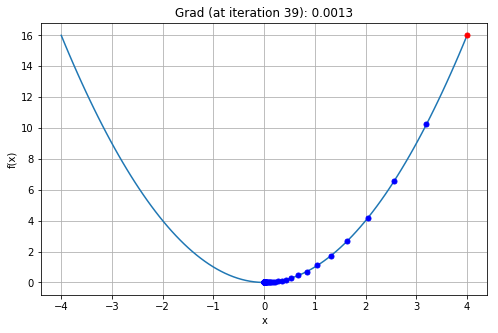

In [2]:
# for plotting; create 100 values evenly spaced in [-1,1]
a = np.linspace(-4,4,100)

plt.figure(figsize=(8,5))
plt.plot(a, np.power(a,2.))

at = 4.0 # start
lr = 0.1 # eta, aka. learning rate

# plot initial position (x^0,f(x^0))
plt.plot(at,np.power(at,2.0),'r.',markersize=10)

# iterate 40 times
for i in np.arange(40):
    
    # create a tensor
    x = torch.tensor([at], requires_grad=True)
    # compute f(x)
    y = torch.pow(x,2.)
    # compute gradient
    grad_x = grad(y,x)[0].item()
    # update rule
    at = at - lr*grad_x
    # plot updated position
    plt.plot(at, np.power(at,2.0),'b.',markersize=10)
plt.grid()

# print out the LAST gradient (should be approx. 0, as
# we should have found the minimum by then!
plt.title('Grad (at iteration {}): {:.4f}'.format(i,grad_x))
plt.xlabel('x');
plt.ylabel(r'f(x)');

## A more interesting example

In the following example, we compute the minimum of

$$z = f(x,y) = 0.5x^2 + x + 0.25y^2 - 2$$

using (1) PyTorch's `grad` function and, alternatively, (2) using `.backward()`.


In [4]:
import math
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm

def func(xv, yv):
    return 0.5*xv**2 + xv + 0.25*yv**2 - 2

First, lets plot the function graph ...

In [5]:
X = np.linspace(-2.5, 2.6, 51)
Y = np.linspace(-2.5, 2.6, 51)
X, Y = np.meshgrid(X, Y)
Z = func(X,Y)

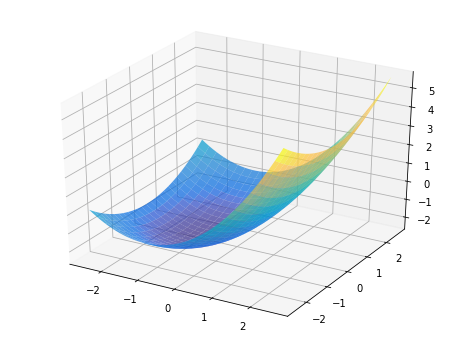

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, 
                Y, 
                Z, 
                cmap=parula_map, 
                linewidth=2, 
                antialiased=True, 
                alpha=0.7);

### Variant 1 - using `grad`

In [6]:
at = [2.0,-2.0] # starting point
lr = 0.1        # eta, aka. learning rate

track = []
for i in np.arange(200):
    
    pts = torch.tensor(at, requires_grad=True)
    
    x = pts[0]
    y = pts[1]
    
    f = 0.5*torch.pow(x, 2.) + x + 0.25*torch.pow(y, 2.) - 2
    
    grad_x, grad_y = grad(f, (x, y))
    
    x = (x - lr*grad_x).detach().item()
    y = (y - lr*grad_y).detach().item()

    at = [x, y]
    track.append([x,y,func(x,y)])

print('Result: ', at)

Result:  [-0.9999997615814209, -7.010531408013776e-05]


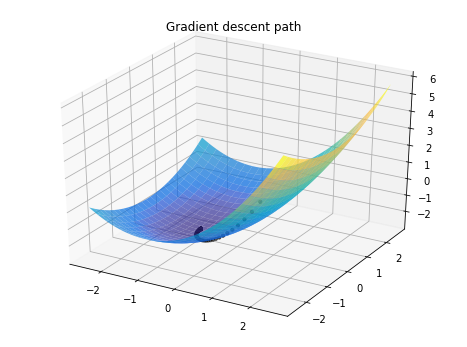

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, 
                Y, 
                Z, 
                cmap=parula_map, 
                linewidth=2, 
                antialiased=True, 
                alpha=0.7);

track = np.array(track)
ax.scatter(track[:,0],
           track[:,1],
           track[:,2],
           color="k",s=10);
ax.set_title('Gradient descent path');

### Variant 2 - using `backward`

In [8]:
at = [2.0,-2.0]
lr = 0.1 

for i in np.arange(200):
    # input data
    pts = torch.tensor(at, requires_grad=True)
    # compute f
    f = 0.5*torch.pow(pts[0], 2.) + pts[0] + 0.25*torch.pow(pts[1],2.) - 2
    # compute gradients
    u = f.backward()
    # update rule
    pts = pts - lr*pts.grad
    # compute new position
    at = pts.detach().numpy() # TODO: remove

print('Result: ', at)  

Result:  [-9.9999976e-01 -7.0105314e-05]


### Variant 3 - using `backward` and an optimizer

Ok, there is an even shorter variant ...

In [10]:
at = torch.tensor([-2.,2.], requires_grad=True)
opt = torch.optim.SGD([at], lr=0.1)

for i in np.arange(200):
    opt.zero_grad()
    f = 0.5*torch.pow(at[0], 2.) + at[0] + 0.25*torch.pow(at[1],2.) - 2
    u = f.backward()
    opt.step()
    
print('Result: ', at.detach().numpy())  

Result:  [-1.0000005e+00  7.0105314e-05]


The function `Tensor.backward()` accumulates gradients in the `grad` fields of
tensors which are not results of operations, the “leaves” in the autograd graph.